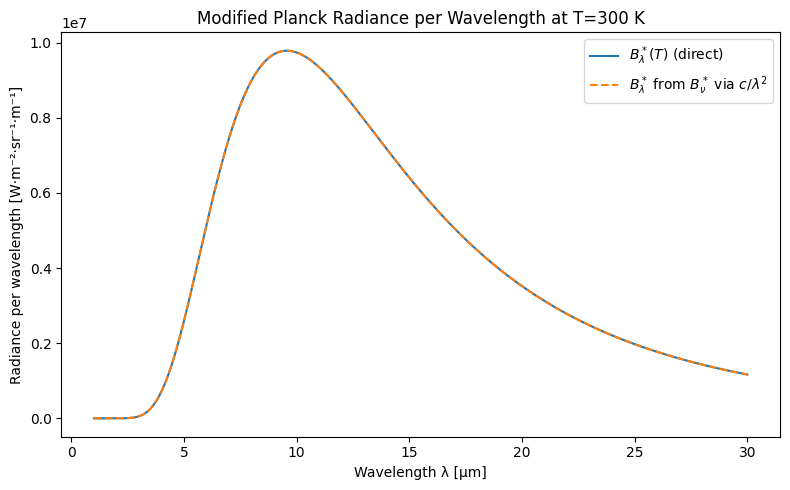

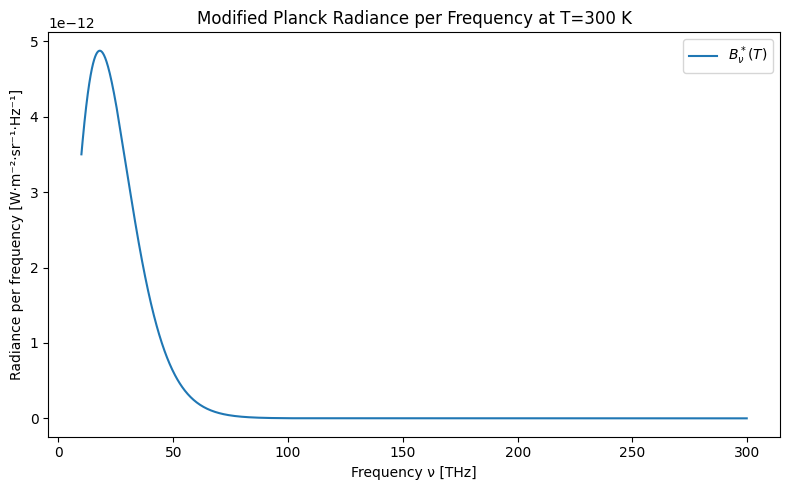

(Modified) Peak of B*_lambda at T=300 K: λ_peak ≈ 9.56 µm
(Modified) Peak of B*_nu at T=300 K:     ν_peak ≈ 17.98 THz
Note: Peaks differ because B*_ν and B*_λ are defined on different variables;
they are related by B*_λ = B*_ν * c / λ^2, not by simple substitution ν=c/λ without the Jacobian.


In [1]:
# Modified Planck function comparison: B*_nu vs B*_lambda at T=300 K
# Uses your quantized/modified form with an extra alpha*(h*nu/kT)^2 (or alpha*(hc/(lam kT))^2) term in the denominator.
# Also demonstrates the Jacobian relationship: B*_lambda = B*_nu * c / lambda^2

import numpy as np
import matplotlib.pyplot as plt

# Physical constants (SI)
h  = 6.62607015e-34   # Planck [J s]
c  = 2.99792458e8     # speed of light [m/s]
kB = 1.380649e-23     # Boltzmann [J/K]

# ---- Modified Planck (your form) ----
def B_star_nu(nu, T, alpha=0.1):
    """Modified Planck radiance per frequency [W·m^-2·sr^-1·Hz^-1].
       B*_nu = (2 h nu^3 / c^2) / [ exp(h nu / kT) - 1 + alpha * (h nu / kT)^2 ]
    """
    x = (h*nu)/(kB*T)
    denom = np.expm1(x) + alpha*(x**2)
    return (2*h*nu**3/c**2) / denom

def B_star_lambda(lam, T, alpha=0.1):
    """Modified Planck radiance per wavelength [W·m^-2·sr^-1·m^-1].
       B*_lam = (2 h c^2 / lam^5) / [ exp(hc/(lam kT)) - 1 + alpha * (hc/(lam kT))^2 ]
    """
    x = (h*c)/(lam*kB*T)
    denom = np.expm1(x) + alpha*(x**2)
    return (2*h*c**2/lam**5) / denom

# Temperature
T = 300.0  # K
alpha = 0.1  # your correction coefficient (can be tuned)

# Wavelength grid: 1–30 µm
lam_um = np.linspace(1.0, 30.0, 1000)
lam_m  = lam_um * 1e-6
# Frequency grid corresponding to the same wavelengths (nu = c/lambda)
nu = c/lam_m

# Compute both modified forms
Bstar_lam = B_star_lambda(lam_m, T, alpha=alpha)     # per wavelength (modified)
Bstar_nu_vals = B_star_nu(nu, T, alpha=alpha)        # per frequency (modified)
# Convert B*_nu to per wavelength using Jacobian: B*_lambda = B*_nu * c / lambda^2
Bstar_lam_from_Bnu = Bstar_nu_vals * c / (lam_m**2)

# Plot 1: B*_lambda (direct) and B*_lambda reconstructed from B*_nu
plt.figure(figsize=(8,5))
plt.plot(lam_um, Bstar_lam, label=r"$B^*_\lambda(T)$ (direct)")
plt.plot(lam_um, Bstar_lam_from_Bnu, linestyle="--", label=r"$B^*_\lambda$ from $B^*_\nu$ via $c/\lambda^2$")
plt.xlabel("Wavelength λ [µm]")
plt.ylabel("Radiance per wavelength [W·m⁻²·sr⁻¹·m⁻¹]")
plt.title("Modified Planck Radiance per Wavelength at T=300 K")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: B*_nu vs frequency (THz)
nu_THz = nu / 1e12
plt.figure(figsize=(8,5))
plt.plot(nu_THz, Bstar_nu_vals, label=r"$B^*_\nu(T)$")
plt.xlabel("Frequency ν [THz]")
plt.ylabel("Radiance per frequency [W·m⁻²·sr⁻¹·Hz⁻¹]")
plt.title("Modified Planck Radiance per Frequency at T=300 K")
plt.legend()
plt.tight_layout()
plt.show()

# Compute peaks (numerically)
i_max_lam = np.argmax(Bstar_lam)
lam_peak_um = lam_um[i_max_lam]

i_max_nu = np.argmax(Bstar_nu_vals)
nu_peak_THz = nu_THz[i_max_nu]

print(f"(Modified) Peak of B*_lambda at T=300 K: λ_peak ≈ {lam_peak_um:.2f} µm")
print(f"(Modified) Peak of B*_nu at T=300 K:     ν_peak ≈ {nu_peak_THz:.2f} THz")
print("Note: Peaks differ because B*_\u03bd and B*_\u03bb are defined on different variables;")
print("they are related by B*_\u03bb = B*_\u03bd * c / λ^2, not by simple substitution ν=c/λ without the Jacobian.")
